# 1. Install the BigQuery Library

In [ ]:
pip install google-cloud-bigquery

# 2. Import the needed libraries

In [16]:
import pandas as pd
from google.cloud import bigquery
from google.colab import files
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Extract the data

We will get the data directyl from the GitHub repository we are working with for this project

In [2]:
url = 'https://raw.githubusercontent.com/angelfergar/hr-dashboard/main/data/data.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# 4. Clean the data

There are two columns with null values:


*   DateofTermination: This column can have nulls as there are employees still active.
*   ManagerID: We're going to investigate the nulls we found in this column



The first step is checking all the nulls to look for patterns that could help us.

In [5]:
no_manager_id = df["ManagerID"].isnull()
df[no_manager_id]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,...,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,1/21/2019,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,...,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2/6/2019,0,14


Every null value is related to the ManagerName Webster Butler. We have to check if there's an ID assigned to this manager, of it we could assign an ID to them.

In [6]:
unique_managers = df[['ManagerID', 'ManagerName']].drop_duplicates()
unique_managers.sort_values("ManagerID")

,ManagerID,ManagerName
29,1.0,Brandon R. LeBlanc
27,2.0,Janet King
26,3.0,Brandon R. LeBlanc
1,4.0,Simon Roup
35,5.0,Jennifer Zamora
48,6.0,Eric Dougall
9,7.0,Peter Monroe
97,9.0,Board of Directors
6,10.0,Alex Sweetwater
5,11.0,Amy Dunn


Webster Butler has the ManagerID 39, so we're going to assign the same ID to the null values we have in the dataset.

In [7]:
df["ManagerID"].fillna(39, inplace=True)

/tmp/ipython-input-2844504504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ManagerID"].fillna(39, inplace=True)


There are duplicate IDs in the PositionID column. A new column will be used to represent the PositionID

In [8]:
# Create a new column to identify the role of the employee
df["JobID"] = df.groupby(["Position", "Department"]).ngroup() + 1
df.drop("PositionID", inplace=True, axis = 1)

# 5. Setting up the columns

After checking the columns, the data model that was designed for this specific dataset is:


*   **Facts table**

* * Employees (EmpID, JobID, ManagerID, Salary)


*   **Dim tables**
* * Demographics (EmpID, DOB, Sex, State, RaceDesc, CitizeDesc, MaritalDesc)
* * Manager (ManagerID, ManagerName)
* * Job (JobID, Position, Deparment)
* * EmploymentStatus (EmpID, EmploymentStatus, DateofHire, RecruitmentSource, DateofTermination, TermReson)
* * Performance (EmpID, LastPerformanceReviewDate PerformanceScore, SpecialProjectsCount, EngagementSurvey, EmpSatisfaction, DaysLateLast30, Absences)




With this data model, we will have to eliminate a list of columns from our original dataset.

In [9]:
def del_cols(df, cols):
  for col in cols:
    df.drop(col, inplace=True, axis= 1)

In [10]:
delete_columns = ["MarriedID", "GenderID", "MaritalStatusID", "EmpStatusID", "DeptID", "PerfScoreID", "FromDiversityJobFairID", "Termd", "Zip", "HispanicLatino"]
del_cols(df, delete_columns)

While checking the dataset initially, it was found that in the column HispanicLatino there were Yes, yes and No, no.

With this in mind, we are going to check the rest of text columns for similar cases.


In [11]:
def unique_values(df, cols):
  for col in cols:
    print(f'{col}: {df[col].unique()}')

In [12]:
columns = ["Position", "State", "Sex", "MaritalDesc", "CitizenDesc", "RaceDesc", "TermReason", "EmploymentStatus", "Department", "ManagerName", "RecruitmentSource" ]
unique_values(df, columns)

Position: ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'CIO']
State: ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex: ['M' 'F']
MaritalDesc: ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc: ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
RaceDesc: ['White' 'Black or African American' 'Two or more races' '

No other issues were found. The dataset is ready to be uploaded.

# 6. Column Correlation

Any correlation in the final table helps to guide the final analysis it's going to be done.

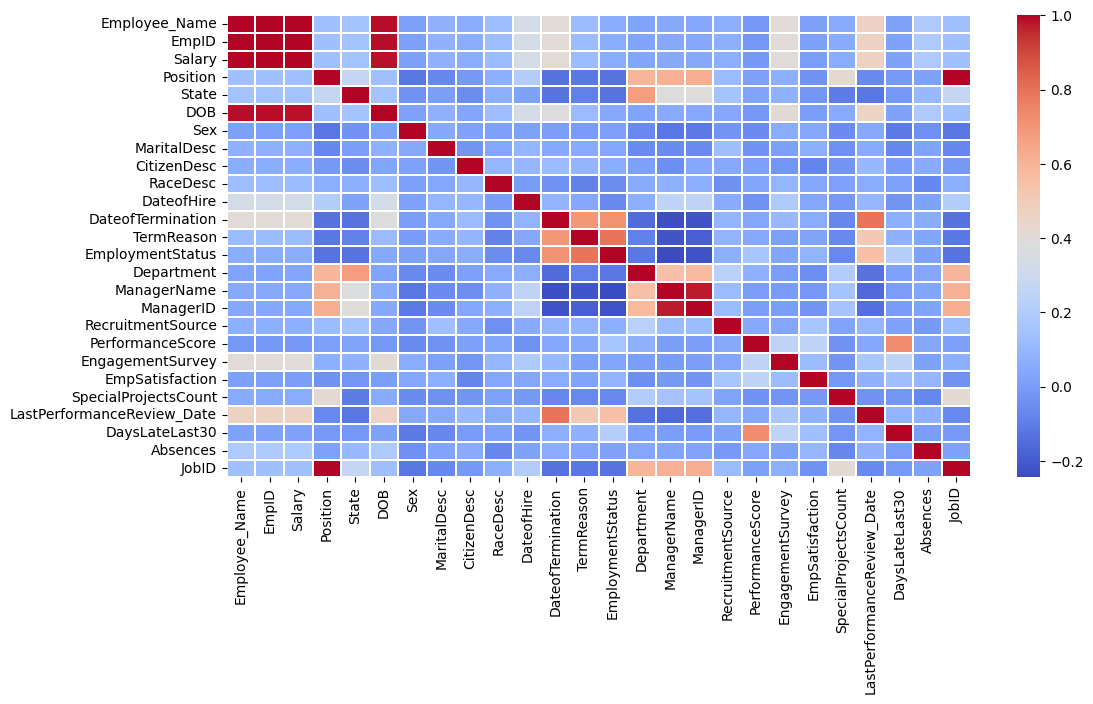

In [20]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="coolwarm")
plt.show()

# 7. Upload to BigQuery

On the BigQuery project, go to IAM and admin>Service Accounts go to the account being used, and click Actions>Manage keys.

From there go to Add Key>Create new key and create a new JSON file. That file is the one we are going to set for the uploaded variable.

In [ ]:
uploaded = files.upload()

Saving credentials.json to credentials.json


In [ ]:
# url looks like /content/file.json
credential_json = input("Introduce your Google Cloud's service account key: ")
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = credential_json

Introduce your Google Cloud's service account key: /content/credentials.json


In [ ]:
client = bigquery.Client()

In [ ]:
dataset_id = input("Introduce the name of the dataset you wish to create: ")
# input your-project.dataset.table
table_id = input("Introduce the name of the table you wish to create: ")

# Create the dataset if it doesn't exist already
dataset_ref = client.dataset(dataset_id)
try:
    client.get_dataset(dataset_ref)
except Exception:
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = "US"
    client.create_dataset(dataset)

Introduce the name of the dataset you wish to create: HR_Data
Introduce the name of the table you wish to create: hr-project-470820.HR_Data.RawData


In [ ]:
# Schema for the new table
schema = [
    bigquery.SchemaField("Employee_Name", "STRING"),
    bigquery.SchemaField("EmpID", "INT64"),
    bigquery.SchemaField("Salary", "FLOAT64"),
    bigquery.SchemaField("Position", "STRING"),
    bigquery.SchemaField("State", "STRING"),
    bigquery.SchemaField("DOB", "STRING"),
    bigquery.SchemaField("Sex", "STRING"),
    bigquery.SchemaField("MaritalDesc", "STRING"),
    bigquery.SchemaField("CitizenDesc", "STRING"),
    bigquery.SchemaField("RaceDesc", "STRING"),
    bigquery.SchemaField("DateofHire", "STRING"),
    bigquery.SchemaField("DateofTermination", "STRING"),
    bigquery.SchemaField("TermReason", "STRING"),
    bigquery.SchemaField("EmploymentStatus", "STRING"),
    bigquery.SchemaField("Department", "STRING"),
    bigquery.SchemaField("ManagerName", "STRING"),
    bigquery.SchemaField("ManagerID", "FLOAT64"),
    bigquery.SchemaField("RecruitmentSource", "STRING"),
    bigquery.SchemaField("PerformanceScore", "STRING"),
    bigquery.SchemaField("EngagementSurvey", "FLOAT64"),
    bigquery.SchemaField("EmpSatisfaction", "INT64"),
    bigquery.SchemaField("SpecialProjectsCount", "INT64"),
    bigquery.SchemaField("LastPerformanceReview_Date", "STRING"),
    bigquery.SchemaField("DaysLateLast30", "INT64"),
    bigquery.SchemaField("Absences", "INT64"),
    bigquery.SchemaField("JobID", "INT64")
]

# Create the table if it doesn't exists
table = bigquery.Table(table_id, schema=schema)
try:
    client.get_table(table_id)
    print(f"The table {table_id} already exists.")
except Exception:
    table = client.create_table(table)

In [ ]:
# Upload the table to the dataset
job = client.load_table_from_dataframe(df, table_id, job_config=bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE"))
job.result()

LoadJob<project=hr-project-470820, location=US, id=2adf4a1f-de63-42a7-b2e3-47ffb67f5662>